## Asignar librerias y cargar datos

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)
datos = df['Temp'].values

## Transformacion de datos y EDA

In [32]:
#Escalamos los datos porque el modelo lstm funciona mejor con datos normalizados
scaler = MinMaxScaler(feature_range=(0, 1))
datos_normalizados = scaler.fit_transform(datos.reshape(-1, 1))

(array([ 17.,  36.,  59., 122., 217., 347., 414., 448., 424., 406., 367.,
        303., 233., 114.,  62.,  40.,  25.,   7.,   5.,   4.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

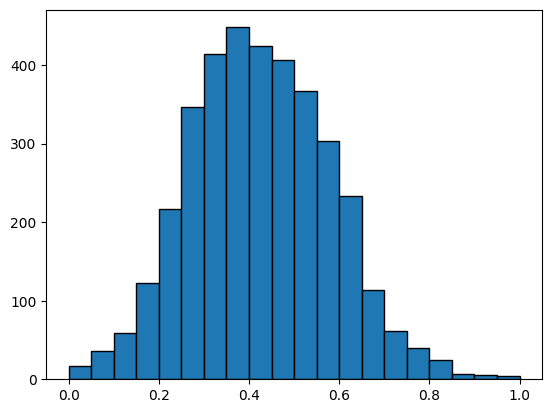

In [33]:
plt.hist(datos_normalizados, bins=20, edgecolor='black')

In [34]:
def crear_secuencias(data, n_pasos):
    X, y = [], []
    for i in range(len(data) - n_pasos):
        X.append(data[i:i + n_pasos])
        y.append(data[i + n_pasos])
    return np.array(X), np.array(y)

In [35]:
n_pasos = 60
X, y = crear_secuencias(datos_normalizados, n_pasos)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Definicion del Modelo LSTM

In [37]:
modelo = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(n_pasos, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

C:\Users\yamil\miniforge3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## Compilacion del modelo y entrenamiento

In [39]:
modelo.compile(optimizer='adam', loss='mse')

In [40]:
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0392 - val_loss: 0.0117
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0122 - val_loss: 0.0113
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0121 - val_loss: 0.0112
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0119 - val_loss: 0.0111
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0121 - val_loss: 0.0111
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0117 - val_loss: 0.0109
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0113 - val_loss: 0.0108
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0

## Analisis de Resultados / Graficos

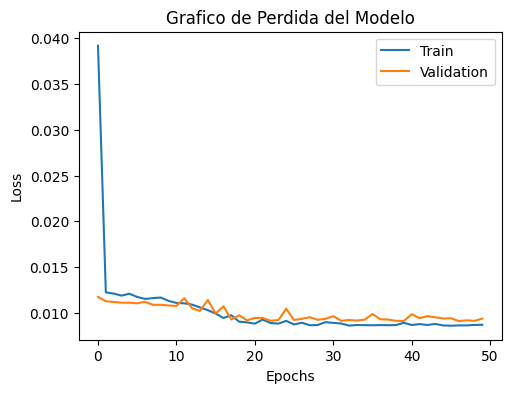

In [55]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Grafico de Perdida del Modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [42]:
predicciones = modelo.predict(X_test)
predicciones = scaler.inverse_transform(predicciones)
y_test_real = scaler.inverse_transform(y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


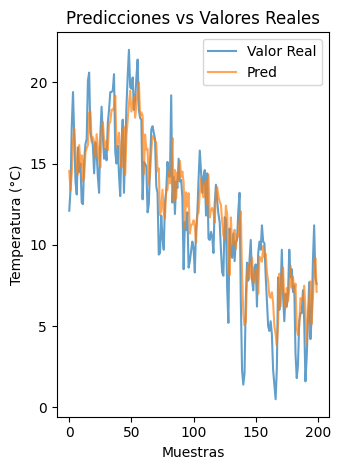

In [45]:
plt.subplot(1, 2, 2)
plt.plot(y_test_real[:200], label='Valor Real', alpha=0.7)
plt.plot(predicciones[:200], label='Pred', alpha=0.7)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Muestras')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
mae = mean_absolute_error(y_test_real, predicciones)
mse = mean_squared_error(y_test_real, predicciones)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, predicciones)

print('\nMétricas de Evaluación del Modelo:')
print(f'MAE: {mae:.4f}°C')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}°C')
print(f'R²: {r2:.4f}')
print(f'\nTotal de datos: {len(datos)}')
print(f'Rango de temperatura: {datos.min():.1f}°C - {datos.max():.1f}°C')


Métricas de Evaluación del Modelo:
MAE: 1.7444°C
MSE: 4.8854
RMSE: 2.2103°C
R²: 0.7104

Total de datos: 3650
Rango de temperatura: 0.0°C - 26.3°C


In [47]:
comparacion = pd.DataFrame({
    'Valor Real': y_test_real[:5].flatten(),
    'Pred': predicciones[:5].flatten(),
    'Error': (y_test_real[:5] - predicciones[:5]).flatten()
})
comparacion['Error'] = comparacion['Error'].round(2)
comparacion['Valor Real'] = comparacion['Valor Real'].round(2)
comparacion['Pred'] = comparacion['Pred'].round(2)

In [48]:
print('\nComparacion Valor Real vs Prediccion:')
print(comparacion.to_string(index=False))


Comparacion Valor Real vs Prediccion:
 Valor Real      Pred  Error
       12.1 14.540000  -2.44
       13.4 13.350000   0.05
       17.3 14.380000   2.92
       19.4 16.379999   3.02
       16.6 17.129999  -0.53


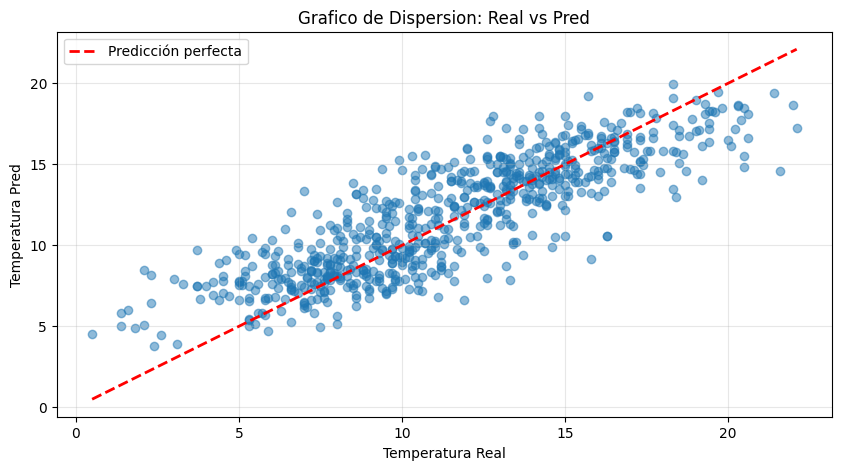

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_real, predicciones, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()], 
         [y_test_real.min(), y_test_real.max()], 
         'r--', lw=2, label='Predicción perfecta')
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Pred')
plt.title('Grafico de Dispersion: Real vs Pred')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()